# Homework Set 3

In [1]:
%pylab inline
import pandas as pd
import numpy as np

import fmt

Populating the interactive namespace from numpy and matplotlib


#### Unless explicitly forbidden, you can use any python functions from numpy/scipy to solve homework problems.

## Problem 1
$\renewcommand{bs}{\boldsymbol}$

We discussed three different ways of solving the least square problem of $\min_{\boldsymbol \beta}\Vert X \bs \beta - \boldsymbol y\Vert_2$ in the lecture: 1) the pseudo-inverse $X^+$ 2) QR decomposition 3) SVD. 

1. if $X$ is not fully ranked, i.e., its column vectors are linearly dependent, do the three methods still work?
2. if not, can you propose an modifications to the QR method, so that you can find the minimum value of $\Vert X \bs \beta - \boldsymbol y\Vert_2$ even when $X$ is rank deficient? Note that $\bs \beta$ is not unique when $X$ is not fully ranked, but there is still a deterministic answer to the minimum value of $\Vert X \bs \beta - \boldsymbol y\Vert_2$. 
3. what is an easy and effective method to find a $\bs \beta$ that is good enough when $X$ is not fully ranked in practice?

Hint:
- It is also possible to make SVD work with rank deficient matrix. Please refer to http://www.cs.cornell.edu/Courses/cs3220/2010sp/notes/svd.pdf if you are interested.

The following problems use the same CMT treasury data set from the class:

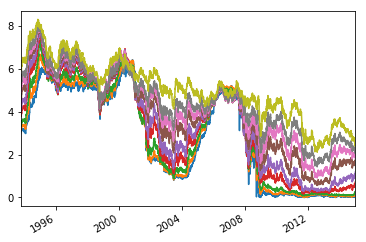

In [2]:
cmturl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/cmt.csv"
cmt_rates = pd.read_csv(cmturl, parse_dates=[0], index_col=[0])

cmt_rates.plot(legend=False);
tenors = cmt_rates.columns.map(float)
tenorTags = ['T=%g' % m for m in tenors]

##　Problem 2

Take the covariance matrix $V$ estimated from the CMT historical levels, compute the following:
1. its L-2 condition number
2. its singular values, and the ratio between the largest and smallest singular values
3. Comment on whether there could be troubled area when computing $\bs y = V^{-1} \bs x$ from this co-variance matrix, if so, give an example of $\bs x$ that the resulting $\bs y$ changes a lot even with a small perturbations in $x$.

## Problem 3

From the interest rate historical data, 
1. estimate the covariance of the daily interest rate **changes**
2. run the PCA analysis on both the correlation and covariance matrix of the changes, and comment on whether they give equivalent principal components. Note that the correlation matrix can be viewed as the covariance matrix with the normalized risk factors. Make sure you take the normalization into account when comparing the eigenvectors. Try to find a clear way to illustrate their equivalence of the eigen vectors or the lack of.
3. from your results, how many principal components are required to explain 95% of the variance of rate changes? 
4. Plot these principal components of the covariance matrix that account for 95% of the variance and try to give economic explanations of what mode of rates changes they represent.
4. plot the history of PCA scores, i.e., the factor loading (or the projection) to the first 3 principal components, of the historical data.
4. write a program to simulate the daily interest rate **changes** up to the future time of 20Y using the first few principal components of the **changes** that accounted for 95% of the variance. From your simulated IR change paths, re-estimate the covariance matrix of the **changes**, then comapre it to the original covariance matrix estimated from historical data. (think of a suitable metric for the comparison). You can assume that the daily rates changes are independent normals, and there are 250 business days per year. 
5. obtain the IR **levels** from the simulated paths of changes in the previous step, and compute the following statistical metrics of the IR **level** distributions: mean, standard deviation, 2% and 98% quantiles. Plot the evolution of these statistical metrics over time for the 1Y and 10Y term rates. Make any reasonable assumptions on the starting interest rate term structure. 
6. [extra credit] Compute the 2% and 98% quantile of the historical 1Y and 10Y rate levels, and comment on if the simulated levels from the previous step matches the historical quantiles.
6. [extra credit] Comment on what could be done to make the simulated IR term structure more realistic. And which is a more suitable choice, PCA on IR levels or changes? Does your answer depend on your application?

Hints:
* numpy has a build in random number generator package, numpy.random.
* cumsum, percentile are useful functions from numpy, you can use them to simplify your code
* for step 6, since the principal components are orthogonal, you can simply drive the change simulation using independent normal random numbers. Don't forget to take into account the eigen values in your simulation, i.e., the eigen values are the variance along the direction of the principal components. 
* for step 7, the levels are the sum of initial curve and daily changes, numpy.cumsum is a useful function to compute cumulative sums.